<a href="https://colab.research.google.com/github/chewan721/SMS-spam-Detection/blob/main/23056535_chewan_regmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving SMSSpamCollection to SMSSpamCollection


## Step 1: Data Collection / Load

### Load dataset from CSV.
### Check first few rows and column names.
### Inspect shape and class distribution.

In [ ]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load dataset
# SMS Spam Collection dataset, tab-separated, no header
data = pd.read_csv("SMSSpamCollection", sep='\t', header=None, names=["Label", "Message"])

# Quick look at first 5 rows
print("First 5 messages:\n", data.head())

# Check dataset shape
print("\nDataset shape:", data.shape)

# Check class distribution
print("\nClass distribution:\n", data['Label'].value_counts())


First 5 messages:
   Label                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Dataset shape: (5572, 2)

Class distribution:
 Label
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
data['Label'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
data['Label'].value_counts()


,count
Label,
ham,4825
spam,747


In [ ]:
data['Label'].value_counts(normalize=True) * 100

,proportion
Label,
ham,86.593683
spam,13.406317


## Step 2: Data Cleaning

### Remove duplicates if any.
### Handle missing values.

In [ ]:
# Step 2: Data Cleaning
# 1. Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# 2. Identify duplicate messages
duplicate_messages = data[data.duplicated(subset='Message')]
print("Number of duplicate messages:", duplicate_messages.shape[0])

# 3. Remove duplicate messages
data = data.drop_duplicates(subset='Message', keep='first')

# 4. Check dataset shape after cleaning
print("Dataset shape after removing duplicates:", data.shape)

# 5. Preview cleaned dataset
data.head()


Missing values in each column:
Label      0
Message    0
dtype: int64
Number of duplicate messages: 403
Dataset shape after removing duplicates: (5169, 2)


,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Step 3: Exploratory Data Analysis (EDA)

### Class distribution plot (ham vs spam).


Class distribution:
 Label
ham     4516
spam     653
Name: count, dtype: int64


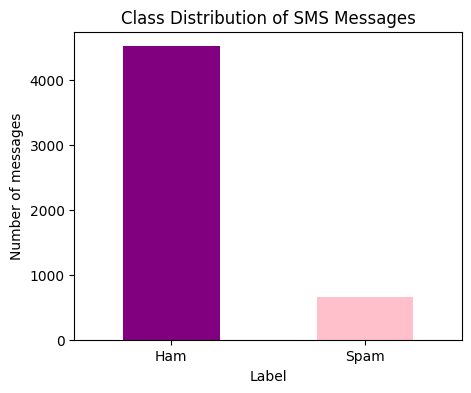

In [ ]:
import matplotlib.pyplot as plt
# 1. Class distribution
class_counts = data['Label'].value_counts()
print("Class distribution:\n", class_counts)

# Plot class distribution
plt.figure(figsize=(5,4))
class_counts.plot(kind='bar', color=['purple','pink'])
plt.xticks([0,1], ['Ham', 'Spam'], rotation=0)
plt.ylabel('Number of messages')
plt.title('Class Distribution of SMS Messages')
plt.show()

## Step 4: Text Preprocessing

### Lowercase text.
### Remove punctuation.
### Remove stopwords (either manually or auto-generated).

In [ ]:
import string
# Define minimal stopwords (manual list)
basic_stopwords = {'is', 'am', 'are', 'was', 'were', 'be', 'been', 'being',
                   'the', 'a', 'an', 'and', 'or', 'but', 'to', 'of', 'in',
                   'on', 'at', 'for'}

# Function to clean messages
def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 3. Remove stopwords
    words = [word for word in text.split() if word not in basic_stopwords]

    # Reconstruct the cleaned text
    return ' '.join(words)

# Apply preprocessing
data['Clean_Message'] = data['Message'].apply(preprocess_text)

# Verify first 5 cleaned messages
print(data[['Message', 'Clean_Message']].head())


                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                       Clean_Message  
0  go until jurong point crazy available only bug...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3        u dun say so early hor u c already then say  
4  nah i dont think he goes usf he lives around h...  


In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = [w for w in text.split() if w not in basic_stopwords]
    return " ".join(words)

data['Clean_Message'] = data['Message'].apply(preprocess_text)

# Correct way to print a sample
print("Sample of cleaned messages:\n", data['Clean_Message'].head())


Sample of cleaned messages:
 0    go until jurong point crazy available only bug...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3          u dun say so early hor u c already then say
4    nah i dont think he goes usf he lives around h...
Name: Clean_Message, dtype: object


## Step 5: Train/Test Split

### Split dataset into training and testing sets (e.g., 70/30)s.
### Keep X = features, y = labels.

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Label encoding (binary classification)
# 'ham' = 0, 'spam' = 1
data['Label'] = data['Label'].map({'ham': 0, 'spam': 1})

# Step 2: Define features and target
X = data['Clean_Message']   # cleaned text messages
y = data['Label']           # encoded labels

# Step 3: Train-test split (70:30), stratified
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    #test_size = 0.2,
    stratify=y,      # preserves class distribution
    random_state=42  # reproducible split
)

# Step 4: Print dataset sizes
print("Training samples:", X_train_raw.shape[0])
print("Testing samples:", X_test_raw.shape[0])

Training samples: 3618
Testing samples: 1551


## Step 6: Feature Extraction

### TF-IDF to convert cleaned messages into numerical features.
### Check shape of feature matrix.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit on training data and transform
X_train = tfidf.fit_transform(X_train_raw)

# Transform test data
X_test = tfidf.transform(X_test_raw)

# Print shapes of feature matrices
print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)

Training feature shape: (3618, 7639)
Testing feature shape: (1551, 7639)


## Step 7: Model Training

### Train Naive Bayes.
### Train Logistic Regression.
### Save accuracy, precision, recall, F1-score.

In [ ]:
# Model Fitting (Training Only)
from sklearn.naive_bayes import MultinomialNB

# Initialize model
# Naive Bayes: give equal weight to both classes (ham, spam)
#nb_model = MultinomialNB(class_prior=[0.5, 0.5])
nb_model1 = MultinomialNB(class_prior=[0.5,0.5], alpha=0.5)


# Train models
#nb_model.fit(X_train, y_train)
nb_model1.fit(X_train,y_train)

MultinomialNB(alpha=0.5, class_prior=[0.5, 0.5])

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression: automatically handle imbalance
#lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
#lr_model.fit(X_train, y_train)

lr_model1 = LogisticRegression(max_iter=1000, class_weight='balanced', C=0.5, random_state=42)
lr_model1.fit(X_train,y_train)


LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [ ]:
# Predict on test set
#y_pred_nb = nb_model.predict(X_test)
#y_pred_lr = lr_model.predict(X_test)


#prediction on second round
y_pred_nb1 = nb_model1.predict(X_test)
y_pred_lr1 = lr_model1.predict(X_test)
print ("Models are predicting!!")

Models are predicting!!


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Naive Bayes metrics
"""accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)


print("Naive Bayes Performance")
print(f"Accuracy: {accuracy_nb:.3f}")
print(f"Precision: {precision_nb:.3f}")
print(f"Recall: {recall_nb:.3f}")
print(f"F1-score: {f1_nb:.3f}")


print("\n")

# Logistic Regression metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Performance")
print(f"Accuracy: {accuracy_lr:.3f}")
print(f"Precision: {precision_lr:.3f}")
print(f"Recall: {recall_lr:.3f}")
print(f"F1-score: {f1_lr:.3f}")"""

accuracy_nb1 = accuracy_score(y_test, y_pred_nb1)
precision_nb1 = precision_score(y_test, y_pred_nb1)
recall_nb1 = recall_score(y_test, y_pred_nb1)
f1_nb1 = f1_score(y_test, y_pred_nb1)

print("Naive Bayes Performance round one")
print(f"Accuracy of round one: {accuracy_nb1:.3f}")
print(f"Precision of round one: {precision_nb1:.3f}")
print(f"Recall of round one: {recall_nb1:.3f}")
print(f"F1-score of round one: {f1_nb1:.3f}")
print("\n")

# Logistic Regression metrics
accuracy_lr1 = accuracy_score(y_test, y_pred_lr1)
precision_lr1 = precision_score(y_test, y_pred_lr1)
recall_lr1= recall_score(y_test, y_pred_lr1)
f1_lr1 = f1_score(y_test, y_pred_lr1)

print("Logistic Regression Performance of round one")
print(f"Accuracy of round one: {accuracy_lr1:.3f}")
print(f"Precision of round one: {precision_lr1:.3f}")
print(f"Recall of round one: {recall_lr1:.3f}")
print(f"F1-score of round one: {f1_lr1:.3f}")


Naive Bayes Performance round one
Accuracy of round one: 0.974
Precision of round one: 0.894
Recall of round one: 0.903
F1-score of round one: 0.898


Logistic Regression Performance of round one
Accuracy of round one: 0.967
Precision of round one: 0.840
Recall of round one: 0.913
F1-score of round one: 0.875


## Step 8: Model Evaluation

### Confusion matrix for each model.

### Compare metrics to decide best model.

### Optional: tune hyperparameters and repeat training at least 3 times as your teacher said.

 Naive Bayes Performance 
              precision    recall  f1-score   support

         Ham       0.99      0.98      0.99      1355
        Spam       0.89      0.90      0.90       196

    accuracy                           0.97      1551
   macro avg       0.94      0.94      0.94      1551
weighted avg       0.97      0.97      0.97      1551

Confusion Matrix:
 [[1334   21]
 [  19  177]]

 Logistic Regression Performance 
              precision    recall  f1-score   support

         Ham       0.99      0.97      0.98      1355
        Spam       0.84      0.91      0.88       196

    accuracy                           0.97      1551
   macro avg       0.91      0.94      0.93      1551
weighted avg       0.97      0.97      0.97      1551

Confusion Matrix:
 [[1321   34]
 [  17  179]]


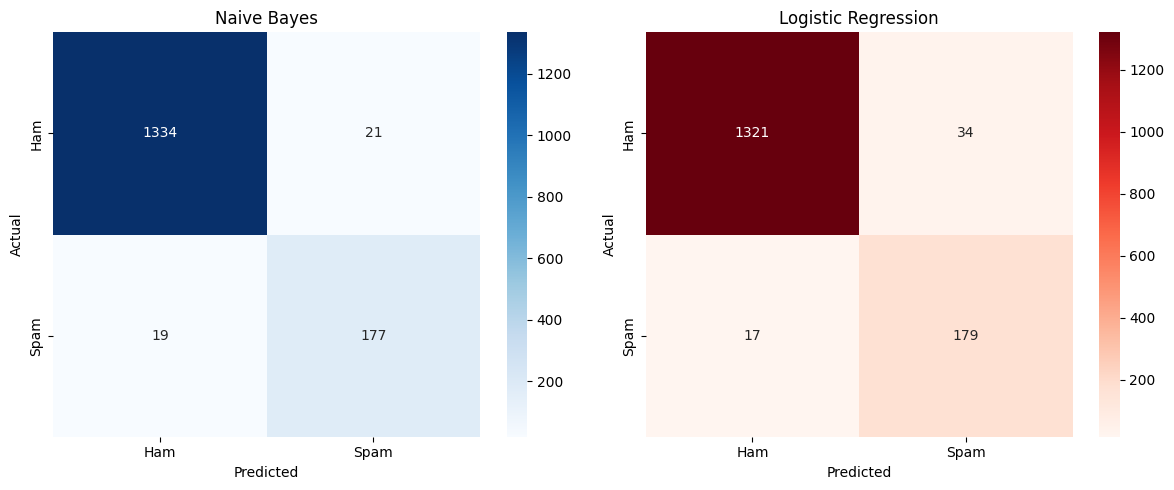

In [ ]:
# Step 8: Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix

# Naive Bayes
print(" Naive Bayes Performance ")
#print(classification_report(y_test, y_pred_nb, target_names=['Ham', 'Spam']))
#cm_nb = confusion_matrix(y_test, y_pred_nb)

print(classification_report(y_test, y_pred_nb1, target_names=['Ham', 'Spam']))
cm_nb1 = confusion_matrix(y_test, y_pred_nb1)
print("Confusion Matrix:\n", cm_nb1)

# Logistic Regression
print("\n Logistic Regression Performance ")
#print(classification_report(y_test, y_pred_lr, target_names=['Ham', 'Spam']))
#cm_lr = confusion_matrix(y_test, y_pred_lr)
#print("Confusion Matrix:\n", cm_lr)

print(classification_report(y_test, y_pred_lr1, target_names=['Ham', 'Spam']))
cm_lr1 = confusion_matrix(y_test, y_pred_lr1)
print("Confusion Matrix:\n", cm_lr1)

# Optional: Visual comparison of confusion matrices
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", ax=axes[0])
sns.heatmap(cm_nb1, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Naive Bayes")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_xticklabels(["Ham", "Spam"])
axes[0].set_yticklabels(["Ham", "Spam"])

#sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Reds", ax=axes[1])
sns.heatmap(cm_lr1, annot=True, fmt="d", cmap="Reds", ax=axes[1])
axes[1].set_title("Logistic Regression")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_xticklabels(["Ham", "Spam"])
axes[1].set_yticklabels(["Ham", "Spam"])

plt.tight_layout()
plt.show()



## Step 9: Results and Visualizations

### Show metrics table.
### Show class distribution / sample predictions.

In [ ]:
# Comparison table
"""metrics_table = pd.DataFrame({ "Model": ["Naive Bayes", "Logistic Regression"],
                              "Accuracy": [accuracy_nb, accuracy_lr],
                              "Precision": [precision_nb, precision_lr],
                              "Recall": [recall_nb, recall_lr],
                              "F1-score": [f1_nb, f1_lr]
                               })"""

metrics_table = pd.DataFrame({"Model1": ["Naive Bayes", "Logistic Regression"],
                              "Accuracy": [accuracy_nb1, accuracy_lr1],
                              "Precision": [precision_nb1, precision_lr1],
                              "Recall": [recall_nb1, recall_lr1],
                              "F1-score": [f1_nb1, f1_lr1]
                              })

metrics_table

,Model1,Accuracy,Precision,Recall,F1-score
0,Naive Bayes,0.974210,0.893939,0.903061,0.898477
1,Logistic Regression,0.967118,0.840376,0.913265,0.875306
